In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = 3*10**8
G = 6.67*10**-11
J = 8.95*10**38 / (3.285*10**23)
M=2*10**32
r_s = 2*G*M/c**2
au=1.5*10**11
input_phi = np.linspace(0,150*np.pi,2000)

def u(phi,eccentricity=0.5056,A=G*M/(J**2),r_s=r_s):
    return A + A*eccentricity*np.cos(phi) + 3/2*r_s*A*A*eccentricity*phi*np.sin(phi)

In [18]:
class ray():
    type = 'light ray'
    c = 3*10**8
    def __init__(self, start_pos, dir,BH_mass):
        self.BH_mass = BH_mass
        self.r_s = 2*G*BH_mass/c**2
        
        if start_pos == 'isco':
            self.x, self.y = [3/2*self.r_s,0]
        else:
            self.x, self.y = start_pos #cartesian position

        self.vx, self.vy = c*np.cos(dir),c*np.sin(dir) # cartesian velocity
        self.BH_x, self.BH_y = [0,0] #cartesian position of BH
        self.r = np.sqrt(self.x**2 + self.y**2) 
        self.phi = np.arctan2(self.y,self.x)
        self.dr = 1/self.r*(self.x*self.vx +self.y*self.vy)
        self.dphi = 1/self.r**2 * (self.x*self.vy -self.y*self.vx)
        



    def cartesian_velocity(self):
        xdot = self.dr*np.cos(self.phi)-self.r*np.sin(self.phi)*self.dphi
        ydot = self.dr*np.sin(self.phi)+self.r*np.cos(self.phi)*self.dphi
        return np.sqrt(xdot**2+ydot**2)

    def cartesian_pos(self):
        x = self.r*np.cos(self.phi)
        y = self.r*np.sin(self.phi)
        return [x,y]
        
    def sigma(self):
        return 1 - self.r_s/self.r
        
    def get_geodesic_acceleration(self):
        e2 = self.dr**2 + self.r**2*self.dphi**2*self.sigma()
        d2r = -self.r_s/2/self.r**2/self.sigma()*e2 + self.r*self.sigma()*self.dphi**2 + self.r_s/2/self.sigma()/self.r**2*self.dr**2
        d2phi = -2/self.r*self.dr*self.dphi
        # print(e2)
        return [d2r, d2phi]

    def update_velocity(self, dtau=1e-8):
        self.dr += dtau*self.get_geodesic_acceleration()[0]
        self.dphi += dtau*self.get_geodesic_acceleration()[1]
        return

    def update_pos(self, dtau=1e-8):
        self.r += self.dr*dtau
        self.phi += self.dphi*dtau
        return 

    def travel(self,niter,i=0):
        
        coords = []
        while i <= niter:
            self.update_velocity()
            self.update_pos()
            if self.r <= self.r_s:
                break
            else:
                coords.append(self.cartesian_pos())
                i+=1
            
        # fig, ax = plt.subplots(figsize=(4,4),dpi=200)
        # bh = plt.Circle((self.BH_x,self.BH_y),radius=self.r_s,color='red')
        # isco = plt.Circle((self.BH_x,self.BH_y),radius=3/2*self.r_s,color='red',fill=False,ls='--')


        # ax.add_patch(bh)
        # ax.add_patch(isco)
        # plt.plot(xpos,ypos,color='k')
        # plt.show()
        return coords

In [66]:
class particle():
    type = 'test particle'
    c = 3*10**8
    def __init__(self, start_pos,start_vel, dir,BH_mass):
        self.BH_mass = BH_mass
        self.r_s = 2*G*BH_mass/c**2
        
        if start_pos == 'isco':
            self.x, self.y = [3*self.r_s,0]
        else:
            self.x, self.y = start_pos #cartesian position

        self.vx, self.vy = start_vel*np.cos(dir),start_vel*np.sin(dir) # cartesian velocity
        self.BH_x, self.BH_y = [0,0] #cartesian position of BH
        self.r = np.sqrt(self.x**2 + self.y**2) 
        self.phi = np.arctan2(self.y,self.x)
        self.dr = 1/self.r*(self.x*self.vx +self.y*self.vy)
        self.dphi = 1/self.r**2 * (self.x*self.vy -self.y*self.vx)

    def cartesian_velocity(self):
        xdot = self.dr*np.cos(self.phi)-self.r*np.sin(self.phi)*self.dphi
        ydot = self.dr*np.sin(self.phi)+self.r*np.cos(self.phi)*self.dphi
        return np.sqrt(xdot**2+ydot**2)

    def cartesian_pos(self):
        x = self.r*np.cos(self.phi)
        y = self.r*np.sin(self.phi)
        return [x,y]
        
    def sigma(self):
        return 1 - self.r_s/self.r
        
    def get_geodesic_acceleration(self):
        e2 = self.dr**2 + (self.r**2*self.dphi**2 + c**2)*self.sigma()
        d2r = -self.r_s/2/self.r**2/self.sigma()*e2 + self.r*self.sigma()*self.dphi**2 + self.r_s/2/self.sigma()/self.r**2*self.dr**2
        d2phi = -2/self.r*self.dr*self.dphi
        # print(e2)
        return [d2r, d2phi]

    def update_velocity(self, dtau=1e-9):
        self.dr += dtau*self.get_geodesic_acceleration()[0]
        self.dphi += dtau*self.get_geodesic_acceleration()[1]
        return

    def update_pos(self, dtau=1e-9):
        self.r += self.dr*dtau
        self.phi += self.dphi*dtau
        return 

    def travel(self,niter,i=0):
        
        coords = []
        while i <= niter:
            self.update_velocity()
            self.update_pos()
            if self.r <= self.r_s:
                break
            else:
                coords.append(self.cartesian_pos())
                i+=1
            
        # fig, ax = plt.subplots(figsize=(4,4),dpi=200)
        # bh = plt.Circle((self.BH_x,self.BH_y),radius=self.r_s,color='red')
        # isco = plt.Circle((self.BH_x,self.BH_y),radius=3/2*self.r_s,color='red',fill=False,ls='--')


        # ax.add_patch(bh)
        # ax.add_patch(isco)
        # plt.plot(xpos,ypos,color='k')
        # plt.show()
        return coords

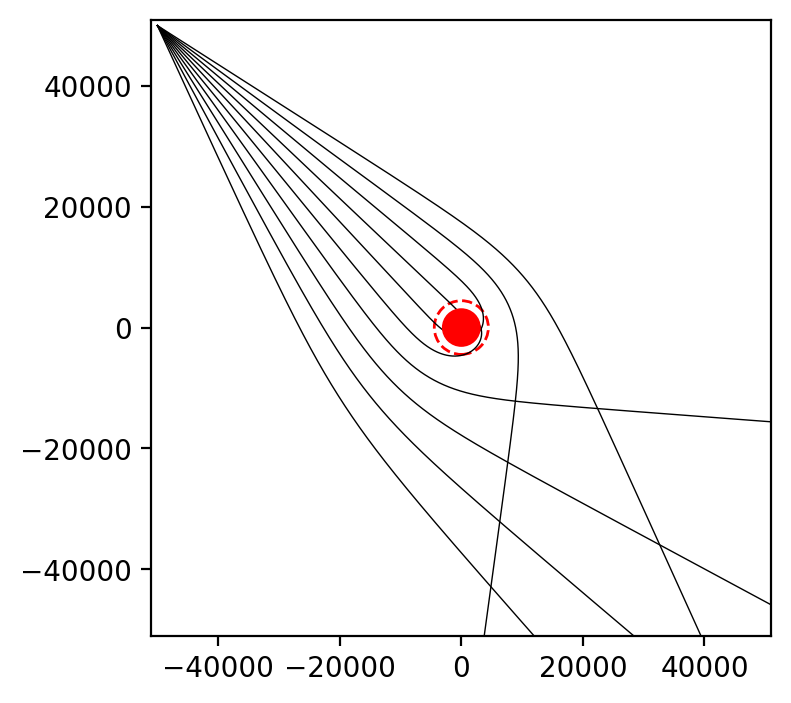

In [11]:
fig, ax = plt.subplots(figsize=(4,4),dpi=200)

rays = 10
dirs = np.linspace(-4*np.pi/11,-2*np.pi/11,rays)
for dir in dirs:
    ph = ray([-5e4,5e4],dir,2e30)
    pos = ph.travel(5e5)
    xpos = np.array([float(i[0]) for i in pos])
    ypos = np.array([float(i[1]) for i in pos])
    plt.plot(xpos,ypos,color='k',linewidth=0.5)
bh = plt.Circle((ph.BH_x,ph.BH_y),radius=ph.r_s,color='red',zorder=11)
isco = plt.Circle((ph.BH_x,ph.BH_y),radius=3/2*ph.r_s,color='red',fill=False,ls='--')
ax.add_patch(bh)
ax.add_patch(isco)
plt.ylim(-5.1e4,5.1e4)
plt.xlim(-5.1e4,5.1e4)
plt.show()

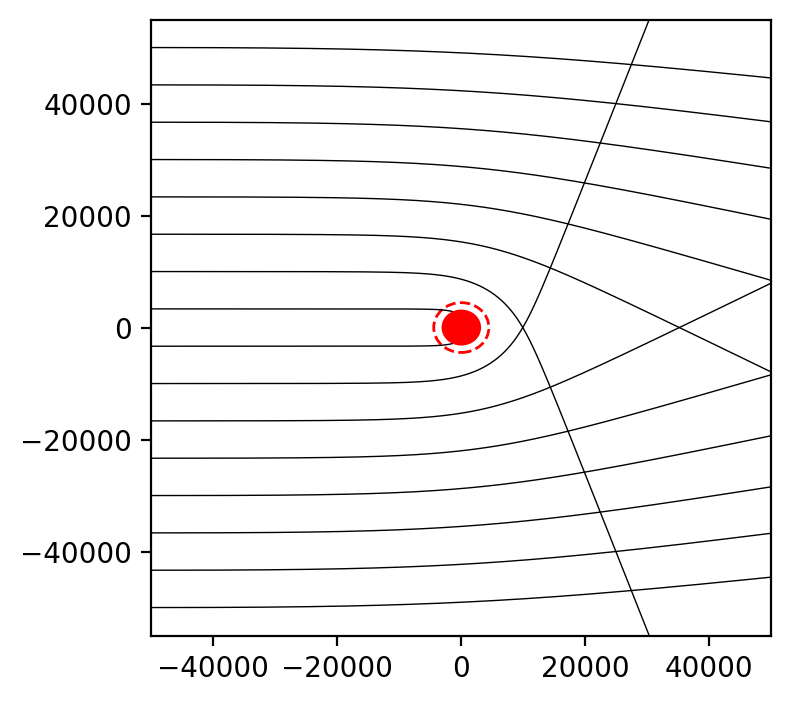

In [12]:
fig, ax = plt.subplots(figsize=(4,4),dpi=200)

rays = 15
x = -5e4
poss=np.linspace(-5e4,5e4,rays+1)
for py in poss:
    ph = ray([x,py],0,2e30)
    pos = ph.travel(1e5)
    xpos = np.array([float(i[0]) for i in pos])
    ypos = np.array([float(i[1]) for i in pos])
    plt.plot(xpos,ypos,color='k',linewidth=0.5)
bh = plt.Circle((ph.BH_x,ph.BH_y),radius=ph.r_s,color='red',zorder=11)
isco = plt.Circle((ph.BH_x,ph.BH_y),radius=3/2*ph.r_s,color='red',fill=False,ls='--')
ax.add_patch(bh)
ax.add_patch(isco)
plt.ylim(-1.1*py,1.1*py)
plt.xlim(x,-x)
plt.show()

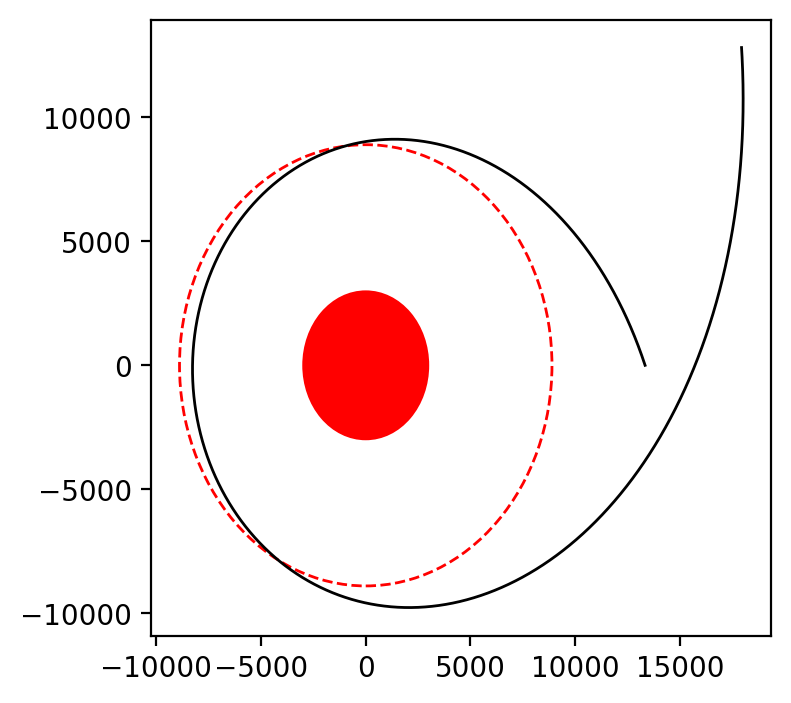

In [67]:
fig, ax = plt.subplots(figsize=(4,4),dpi=200)

ray1 = particle('isco',np.sqrt(G*2e30/1.5/9000),2.1,2e30)
ray1.r = 1.5*ray1.r
trajectory = ray1.travel(5e5)
xpos = np.array([float(i[0]) for i in trajectory])
ypos = np.array([float(i[1]) for i in trajectory])

bh = plt.Circle((ray1.BH_x,ray1.BH_y),radius=ray1.r_s,color='red',zorder=11)
isco = plt.Circle((ray1.BH_x,ray1.BH_y),radius=3*ray1.r_s,color='red',fill=False,ls='--')
ax.add_patch(bh)
ax.add_patch(isco)

plt.plot(xpos,ypos,color='k',lw=1)
plt.show()